In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_parquet('simulation_data.parquet')
df.head(3)

,day,time,cooling_setpoint,heating_setpoint,flow_rate_f_coeff,vent_min_indoor_temp,vent_max_indoor_temp,vent_delta,Facility_Total_Electricity_Demand_Rate,Zone_Air_Temperature,Site_Outdoor_Air_Drybulb_Temperature,Outdoor_Air_Wetbulb_Temperature,Outdoor_Air_Relative_Humidity,Wind_Speed,Wind_Direction,CO2_ppm,Zone_Air_Relative_Humidity,Zone_Air_Temperature_2,Zone_Air_Temperature_3
0,1,0.0,23.0,12.5,0.5,20.0,30.0,-25.0,85564.653384,19.931123,0.191667,-1.144367,77.5,2.0,208.333333,421.588021,20.358438,19.495310,19.803070
1,1,300.0,23.0,12.5,0.5,20.0,30.0,-25.0,73702.185102,20.588140,0.283333,-1.032908,78.0,2.0,206.666667,350.579566,19.768907,20.787933,20.124857
2,1,600.0,23.0,12.5,0.5,20.0,30.0,-25.0,73470.830612,19.863240,0.375000,-0.921274,78.5,2.0,205.000000,321.053043,20.950092,20.313760,19.835794


In [46]:
df.describe()

,day,time,cooling_setpoint,heating_setpoint,flow_rate_f_coeff,vent_min_indoor_temp,vent_max_indoor_temp,vent_delta,Facility_Total_Electricity_Demand_Rate,Zone_Air_Temperature,Site_Outdoor_Air_Drybulb_Temperature,Outdoor_Air_Wetbulb_Temperature,Outdoor_Air_Relative_Humidity,Wind_Speed,Wind_Direction,CO2_ppm,Zone_Air_Relative_Humidity,Zone_Air_Temperature_2,Zone_Air_Temperature_3
count,40896.000000,4.089600e+04,40896.0,40896.0,40896.0,40896.0,40896.0,40896.0,40896.000000,40896.000000,40896.000000,40896.000000,40896.000000,40896.000000,40896.000000,40896.000000,40896.000000,40896.000000,40896.000000
mean,71.503472,6.134250e+06,23.0,12.5,0.5,20.0,30.0,-25.0,65087.312209,22.096905,10.566595,7.598719,69.584055,1.446450,173.564774,384.523172,33.881452,22.595489,22.598571
std,40.991396,3.541741e+06,0.0,0.0,0.0,0.0,0.0,0.0,16170.449568,1.295928,8.619678,7.379485,17.329756,0.988118,120.154924,124.704597,13.949955,1.326506,1.326571
min,1.000000,0.000000e+00,23.0,12.5,0.5,20.0,30.0,-25.0,18593.037358,17.386418,-13.900000,-14.322379,28.000000,0.000000,0.000000,199.537296,6.658098,17.610884,17.703060
25%,36.000000,3.067125e+06,23.0,12.5,0.5,20.0,30.0,-25.0,51046.278993,20.895215,3.700000,1.764271,55.166667,0.950000,45.833333,300.004663,22.646475,21.425576,21.416835
50%,72.000000,6.134250e+06,23.0,12.5,0.5,20.0,30.0,-25.0,63262.578432,22.999058,11.716667,9.046378,71.000000,1.250000,188.333333,366.159495,34.003803,23.212055,23.212989
75%,107.000000,9.201375e+06,23.0,12.5,0.5,20.0,30.0,-25.0,78007.074729,23.000000,17.250000,13.065936,84.083333,2.000000,290.000000,500.000000,44.476219,23.591196,23.599377
max,143.000000,1.226850e+07,23.0,12.5,0.5,20.0,30.0,-25.0,103142.492065,23.250671,30.600000,21.675405,100.000000,5.000000,359.166667,600.962790,66.285492,24.208183,24.210465


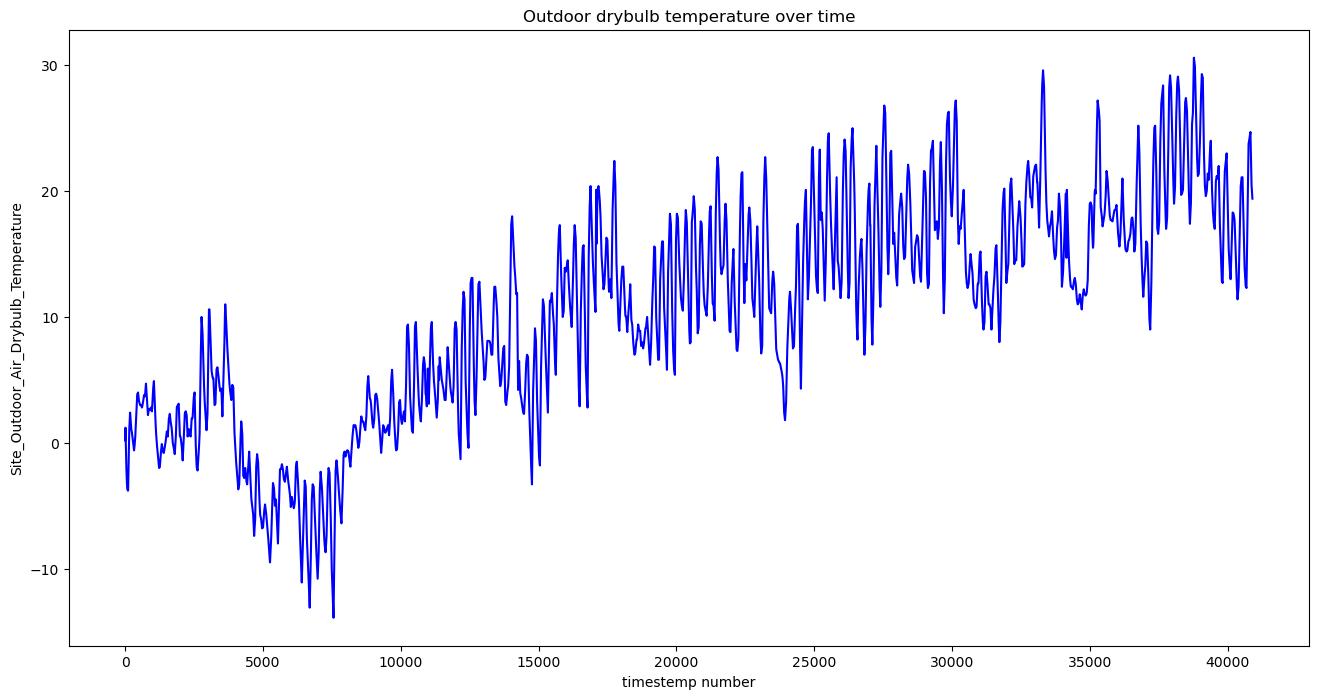

In [47]:
plt.figure(figsize=(16,8))
plt.plot(df['Site_Outdoor_Air_Drybulb_Temperature'], 'b-')
plt.xlabel('timestemp number')
plt.ylabel('Site_Outdoor_Air_Drybulb_Temperature')
plt.title('Outdoor drybulb temperature over time')
plt.show()

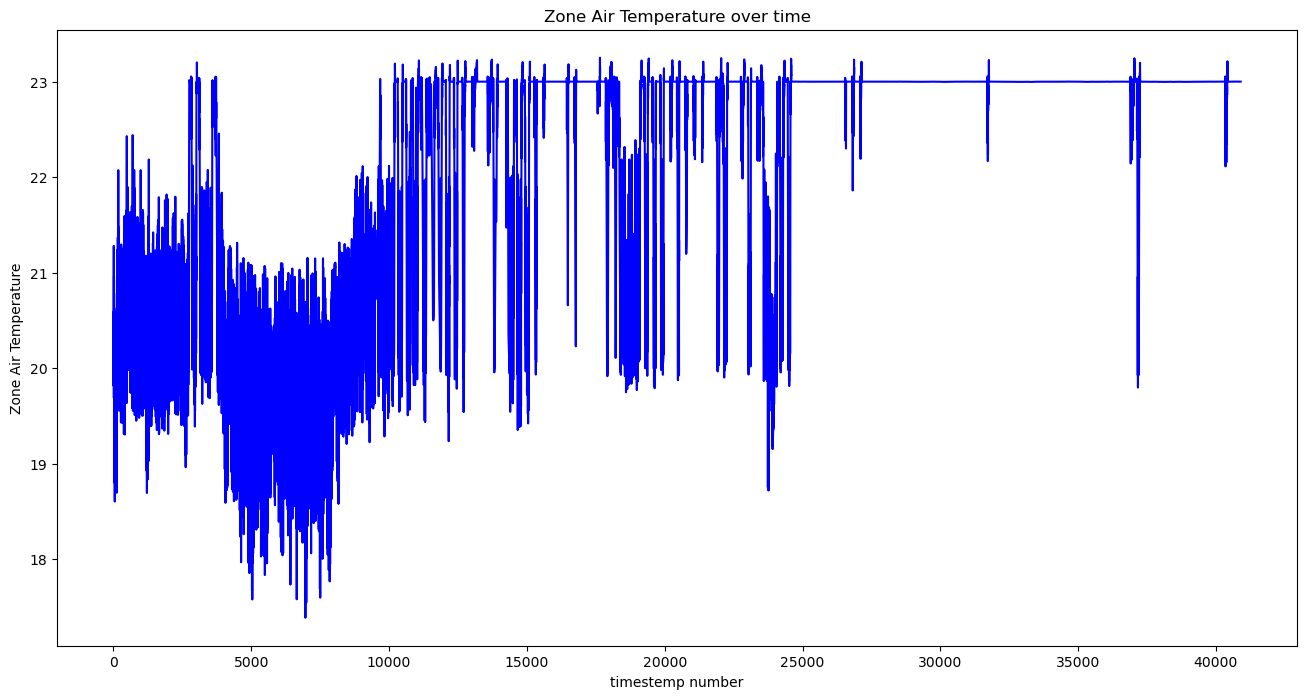

In [48]:
plt.figure(figsize=(16,8))
plt.plot(df['Zone_Air_Temperature'], 'b-')
plt.xlabel('timestemp number')
plt.ylabel('Zone Air Temperature')
plt.title('Zone Air Temperature over time')
plt.show()

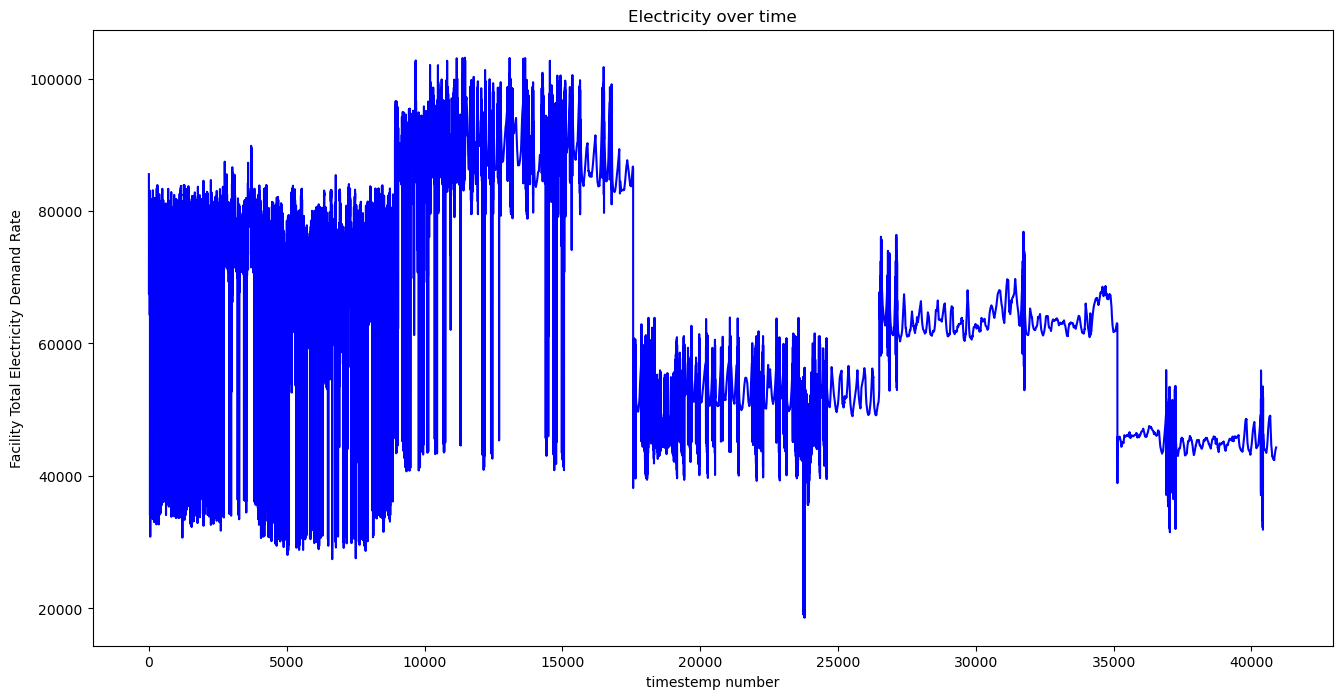

In [49]:
plt.figure(figsize=(16,8))
plt.plot(df['Facility_Total_Electricity_Demand_Rate'], 'b-')
plt.xlabel('timestemp number')
plt.ylabel('Facility Total Electricity Demand Rate')
plt.title('Electricity over time')
plt.show()

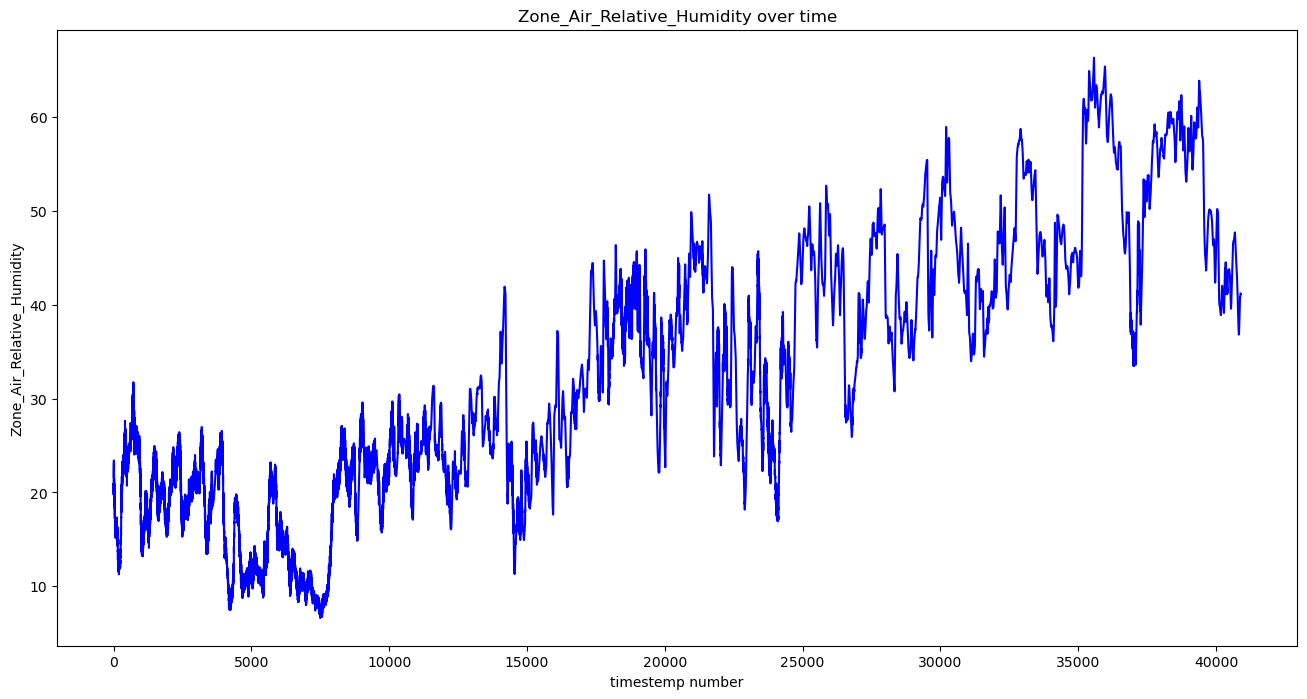

In [50]:
plt.figure(figsize=(16,8))
plt.plot(df['Zone_Air_Relative_Humidity'], 'b-')
plt.xlabel('timestemp number')
plt.ylabel('Zone_Air_Relative_Humidity')
plt.title('Zone_Air_Relative_Humidity over time')
plt.show()

In [56]:
df.iloc[14]

day                                           1.000000
time                                       4200.000000
cooling_setpoint                             23.000000
heating_setpoint                             12.500000
flow_rate_f_coeff                             0.500000
vent_min_indoor_temp                         20.000000
vent_max_indoor_temp                         30.000000
vent_delta                                  -25.000000
Facility_Total_Electricity_Demand_Rate    71541.778464
Zone_Air_Temperature                         21.280287
Site_Outdoor_Air_Drybulb_Temperature          0.875000
Outdoor_Air_Wetbulb_Temperature              -0.215782
Outdoor_Air_Relative_Humidity                82.750000
Wind_Speed                                    2.000000
Wind_Direction                              190.000000
CO2_ppm                                     300.001728
Zone_Air_Relative_Humidity                   21.564471
Zone_Air_Temperature_2                       21.292181
Zone_Air_T